In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
from sklearn.model_selection import KFold
import numpy as np 
import pandas as pd 


In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 224
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

pd.options.display.max_colwidth = 100

import random
import os
from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [4]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [5]:
main_path = "D:\DataSet1\chest_xray"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

In [6]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]


In [7]:
df_train

class  \
0        Normal   
1        Normal   
2        Normal   
3        Normal   
4        Normal   
...         ...   
5211  Pneumonia   
5212  Pneumonia   
5213  Pneumonia   
5214  Pneumonia   
5215  Pneumonia   

                                                                image  
0               D:\DataSet1\chest_xray\train/NORMAL\IM-0115-0001.jpeg  
1               D:\DataSet1\chest_xray\train/NORMAL\IM-0117-0001.jpeg  
2               D:\DataSet1\chest_xray\train/NORMAL\IM-0119-0001.jpeg  
3               D:\DataSet1\chest_xray\train/NORMAL\IM-0122-0001.jpeg  
4               D:\DataSet1\chest_xray\train/NORMAL\IM-0125-0001.jpeg  
...                                                               ...  
5211   D:\DataSet1\chest_xray\train/PNEUMONIA\person99_virus_183.jpeg  
5212  D:\DataSet1\chest_xray\train/PNEUMONIA\person9_bacteria_38.jpeg  
5213  D:\DataSet1\chest_xray\train/PNEUMONIA\person9_bacteria_39.jpeg  
5214  D:\DataSet1\chest_xray\train/PNEUMONIA\person9_bacteria_40.jpeg  
5215  D:\DataSet1\chest_xray\train/PNEUMONIA\person9_bacteria_41.jpeg  

[5216 rows x 2 columns]

In [8]:
df_test

class  \
0       Normal   
1       Normal   
2       Normal   
3       Normal   
4       Normal   
..         ...   
619  Pneumonia   
620  Pneumonia   
621  Pneumonia   
622  Pneumonia   
623  Pneumonia   

                                                                image  
0                D:\DataSet1\chest_xray\test/NORMAL\IM-0001-0001.jpeg  
1                D:\DataSet1\chest_xray\test/NORMAL\IM-0003-0001.jpeg  
2                D:\DataSet1\chest_xray\test/NORMAL\IM-0005-0001.jpeg  
3                D:\DataSet1\chest_xray\test/NORMAL\IM-0006-0001.jpeg  
4                D:\DataSet1\chest_xray\test/NORMAL\IM-0007-0001.jpeg  
..                                                                ...  
619  D:\DataSet1\chest_xray\test/PNEUMONIA\person96_bacteria_465.jpeg  
620  D:\DataSet1\chest_xray\test/PNEUMONIA\person96_bacteria_466.jpeg  
621  D:\DataSet1\chest_xray\test/PNEUMONIA\person97_bacteria_468.jpeg  
622  D:\DataSet1\chest_xray\test/PNEUMONIA\person99_bacteria_473.jpeg  
623  D:\DataSet1\chest_xray\test/PNEUMONIA\person99_bacteria_474.jpeg  

[624 rows x 2 columns]

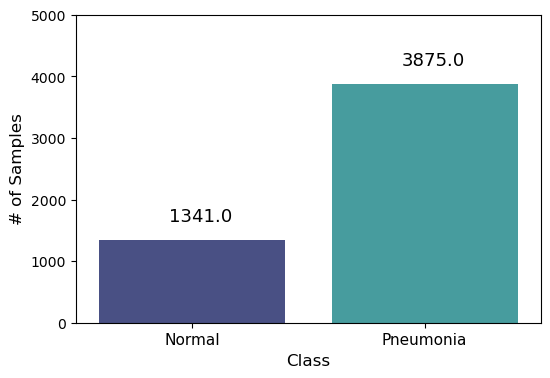

In [9]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

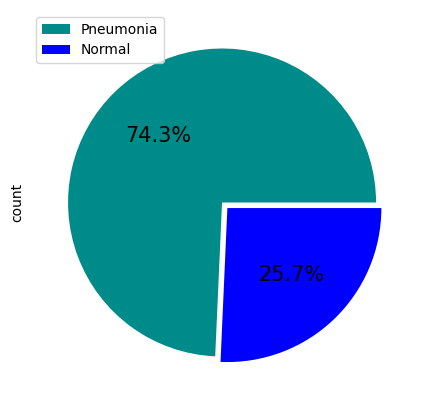

In [10]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()


Train Set - Normal


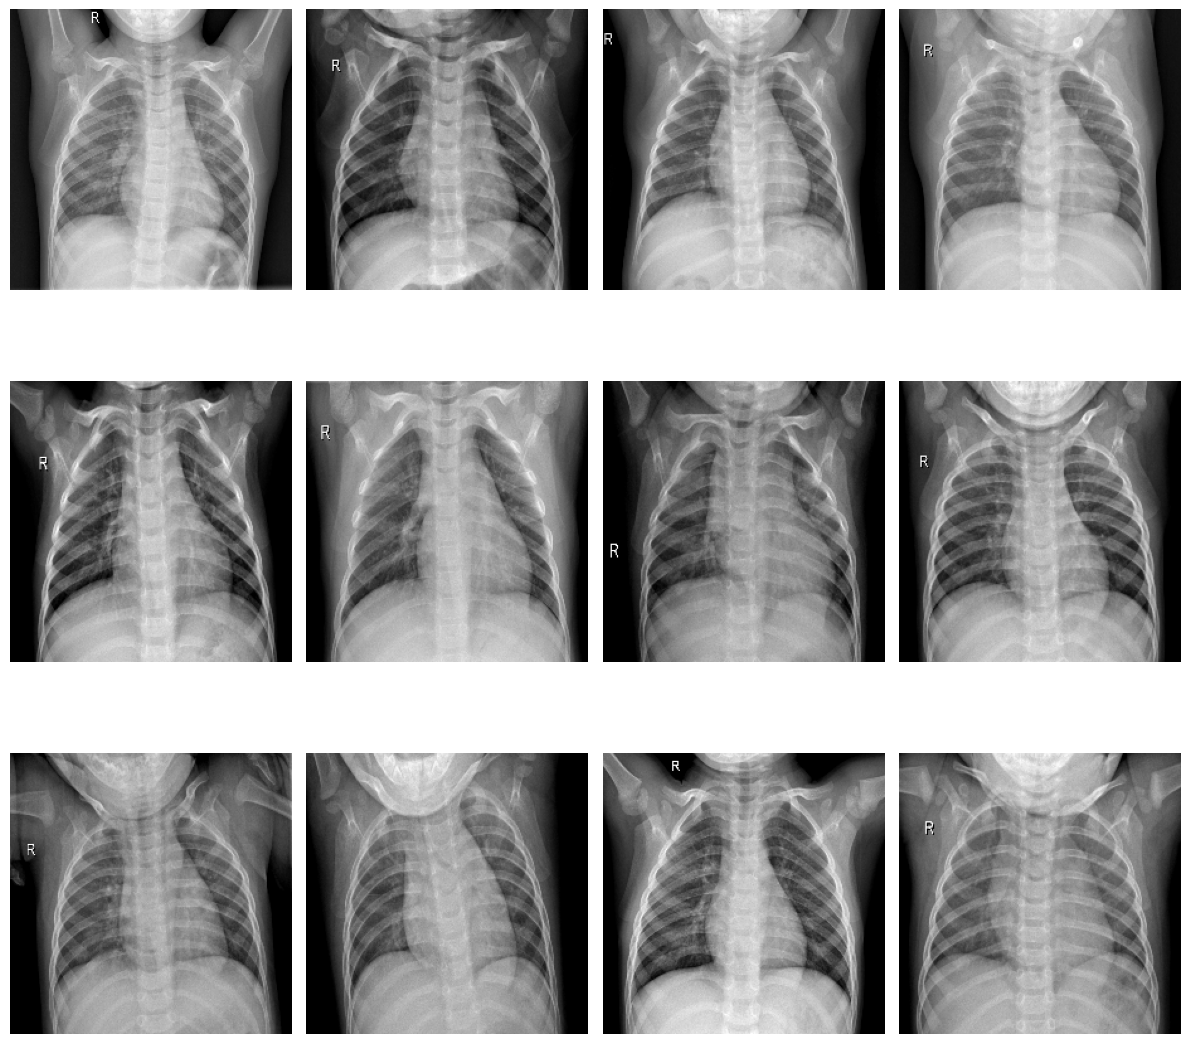

In [11]:
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Pneumonia


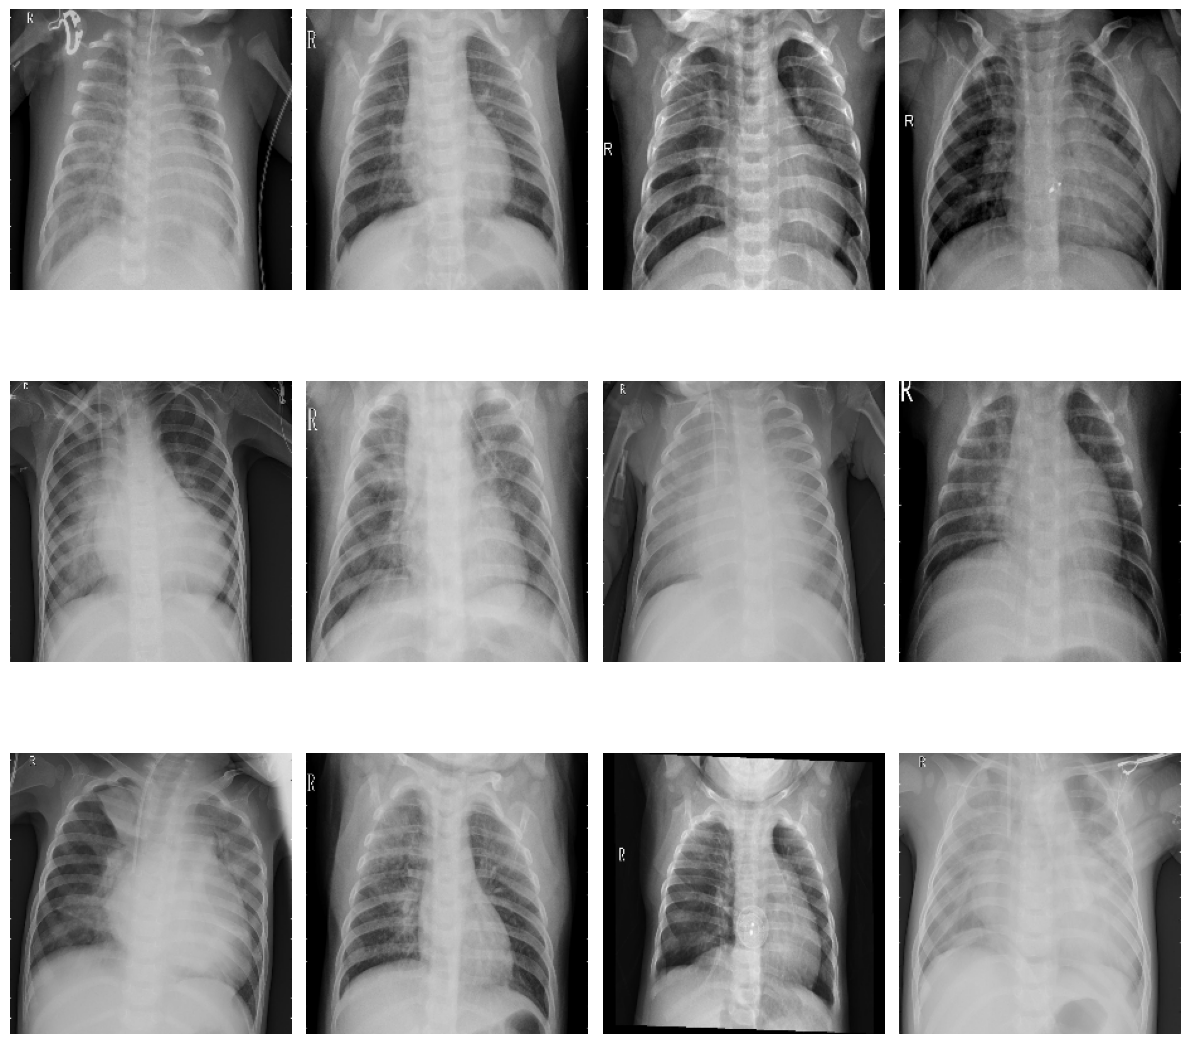

In [12]:
print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

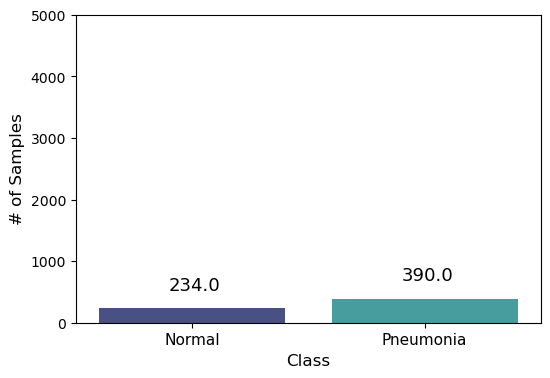

In [13]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

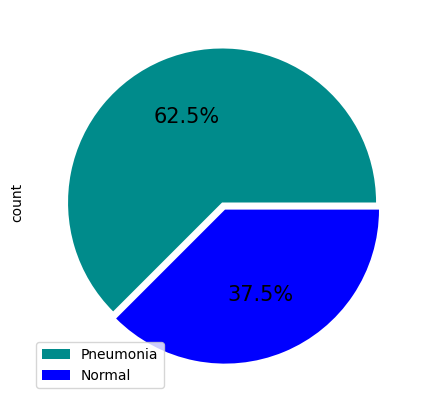

In [14]:
plt.figure(figsize=(7,5))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()


Test Set - Normal


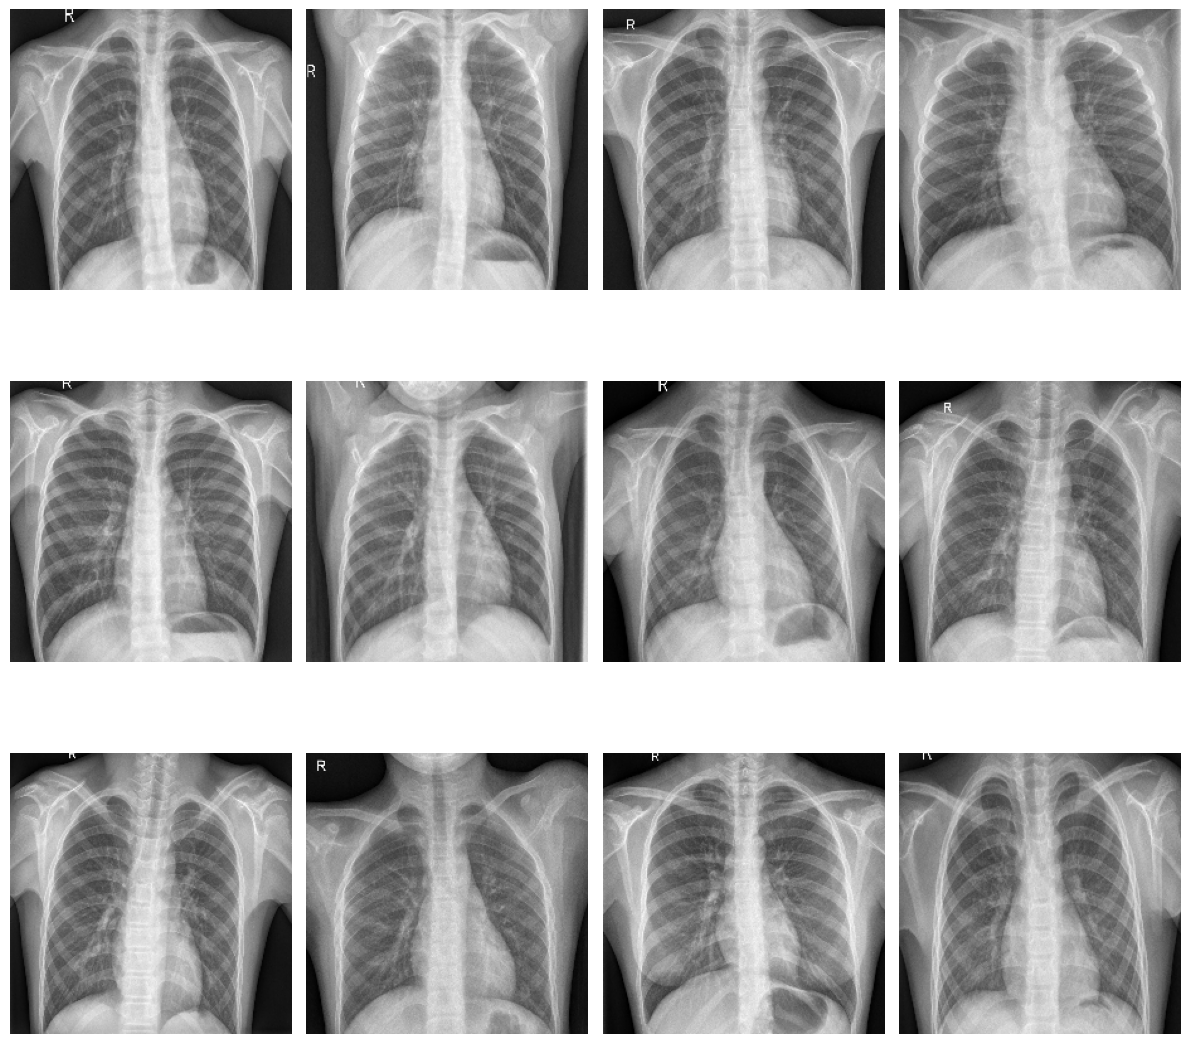

In [15]:
print('Test Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()


Test Set - Pneumonia


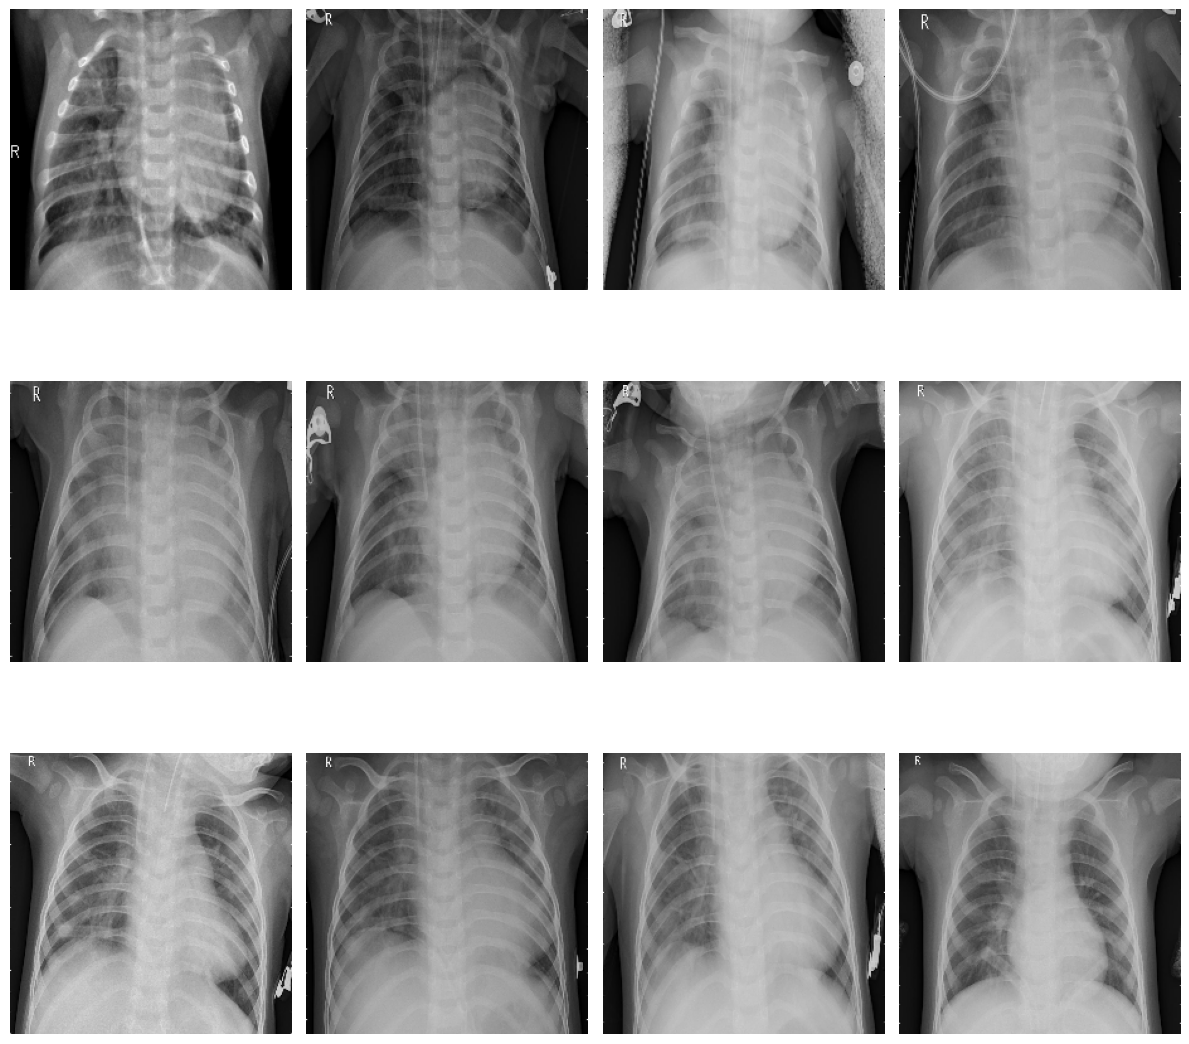

In [16]:
print('Test Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()


In [17]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  
    width_shift_range=0.15,  
    height_shift_range=0.15,  
    shear_range=0.15,  
    zoom_range=0.15,  
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)



val_datagen = ImageDataGenerator(rescale=1/255.)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)


Found 624 validated image filenames belonging to 2 classes.


In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    min_delta=1e-4,
    cooldown=0,
    min_lr=1e-7
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)



In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
# Import the necessary modules
from keras.optimizers import Adam
from keras.metrics import AUC, Precision, Recall
def initial_conv_block(input_layer, num_filters):
    x = layers.Conv2D(num_filters, kernel_size=3, padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def dense_block(input_layer, growth_rate, num_layers):
    x = input_layer
    for _ in range(num_layers):
        # Each layer in the dense block
        conv_layer = layers.Conv2D(growth_rate, kernel_size=3, padding='same')(x)
        conv_layer = layers.BatchNormalization()(conv_layer)
        conv_layer = layers.Activation('relu')(conv_layer)
        # Concatenate with input_layer
        x = layers.Concatenate()([x, conv_layer])
    return x

def transition_block(input_layer, num_filters):
    x = layers.Conv2D(num_filters, kernel_size=1, padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.AveragePooling2D(pool_size=2, strides=2)(x)
    return x

def condensenet(input_shape=(224, 224, 3), growth_rate=8, num_dense_blocks=3, compression_factor=0.5, num_classes=1):
    input_layer = layers.Input(shape=input_shape)
    x = initial_conv_block(input_layer, 16)
    
    for i in range(num_dense_blocks):
        x = dense_block(x, growth_rate, 8)  # 8 is the number of layers in each dense block
        if i != num_dense_blocks - 1:
            num_filters = int(x.shape[-1] * compression_factor)
            x = transition_block(x, num_filters)
    
    x = layers.GlobalAveragePooling2D()(x)
    output_layer = layers.Dense(num_classes, activation='sigmoid')(x)
    
    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# Create a CondenseNet model
model = condensenet()

# Compile the model
model.compile(optimizer=Adam(lr=0.00005),
              loss='binary_crossentropy', 
             metrics=['accuracy', AUC(), Precision(), Recall()])



In [20]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 16)         448       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 224, 224, 16)         64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 224, 224, 16)         0         ['batch_normalization[0][0

In [21]:
#Training The Model
k = 10
kf = KFold(n_splits=k, random_state=SEED, shuffle=True)

fold_performance = []


for fold, (train_index, val_index) in enumerate(kf.split(df_train)):
    print(f"Training fold {fold + 1}/{k}")

    # Splitting the DataFrame into training and validation sets 
    train_fold = df_train.iloc[train_index]
    val_fold = df_train.iloc[val_index]

    # Creating data generators
    ds_train_fold = train_datagen.flow_from_dataframe(
        dataframe=train_fold,
        x_col='image',
        y_col='class',
        target_size=(IMG_SIZE, IMG_SIZE),
        class_mode='binary',
        batch_size=BATCH,
        seed=SEED)

    ds_val_fold = val_datagen.flow_from_dataframe(
        dataframe=val_fold,
        x_col='image',
        y_col='class',
        target_size=(IMG_SIZE, IMG_SIZE),
        class_mode='binary',
        batch_size=BATCH,
        seed=SEED)

    # Fit the model 
    history = model.fit(
        ds_train_fold,
        validation_data=ds_val_fold,
        epochs=5,
        callbacks=[early_stopping, reduce_lr]
     )
    
    # Evaluate the model on the validation set
    scores = model.evaluate(ds_val_fold, verbose=0)
    fold_performance.append(scores)
    # Average performance across folds
    average_performance = np.mean(fold_performance, axis=0)
    print("Average performance across all folds:", average_performance)

Training fold 1/10
Found 4694 validated image filenames belonging to 2 classes.
Found 522 validated image filenames belonging to 2 classes.
Epoch 1/5



147/147 [==============================] - 1069s 7s/step - loss: 0.3073 - accuracy: 0.8581 - auc: 0.9255 - precision: 0.9022 - recall: 0.9084 - val_loss: 2.8512 - val_accuracy: 0.7126 - val_auc: 0.5000 - val_precision: 0.7126 - val_recall: 1.0000 - lr: 0.0010
Epoch 2/5
147/147 [==============================] - 1265s 9s/step - loss: 0.2415 - accuracy: 0.8958 - auc: 0.9525 - precision: 0.9368 - recall: 0.9226 - val_loss: 0.4504 - val_accuracy: 0.8372 - val_auc: 0.9109 - val_precision: 0.8361 - val_recall: 0.9597 - lr: 0.0010
Epoch 3/5
147/147 [==============================] - 1228s 8s/step - loss: 0.2295 - accuracy: 0.9035 - auc: 0.9568 - precision: 0.9433 - recall: 0.9263 - val_loss: 0.3379 - val_accuracy: 0.8812 - val_auc: 0.9517 - val_precision: 0.9726 - val_recall: 0.8575 - lr: 0.0010
Epoch 4/5
147/147 [==============================] - 1263s 9s/step - loss: 0.2183 - accuracy: 0.9092 - auc: 0.9610 - precision: 0.9463 - recall: 0.9312 - val_loss: 0.8992 - val_accuracy: 0.5594 - val_

In [22]:
model.save('pneumonia_detection_CondenseNetModel.h5')


In [23]:
# Evaluate the model on the test dataset
score = model.evaluate(ds_test, steps=len(df_test), verbose=0)

# Print test results
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.37367722392082214
Test accuracy: 0.8381410241127014


In [19]:
from keras.models import load_model

model=load_model('pneumonia_detection_CondenseNetModel.h5')

In [20]:
# Assuming ds_test is your test dataset generator
predictions = model.predict(ds_test, steps=len(df_test), verbose=1)
# Convert predictions to binary using 0.5 as a threshold
predicted_classes = np.where(predictions > 0.5, 1, 0)
true_classes = ds_test.classes


624/624 [==============================] - 18s 28ms/step


In [21]:
report = classification_report(true_classes, predicted_classes, target_names=['Normal', 'Pneumonia'])
print(report)


              precision    recall  f1-score   support

      Normal       0.81      0.74      0.78       234
   Pneumonia       0.85      0.89      0.87       390

    accuracy                           0.84       624
   macro avg       0.83      0.82      0.82       624
weighted avg       0.84      0.84      0.84       624



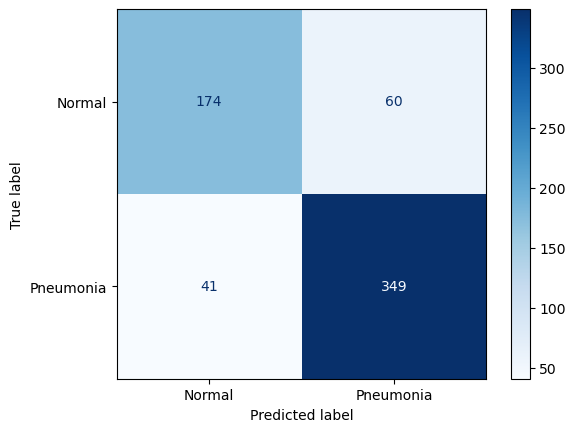

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia'])

# Plot and show the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()


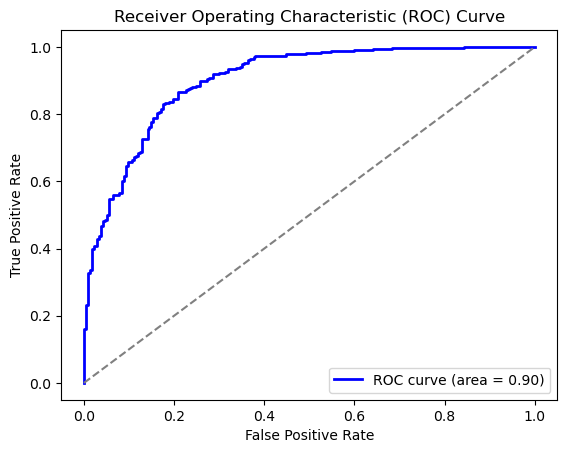

In [23]:
from sklearn.metrics import roc_curve, auc

# Assuming predictions contain probabilities
fpr, tpr, _ = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)

# Plot and show the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


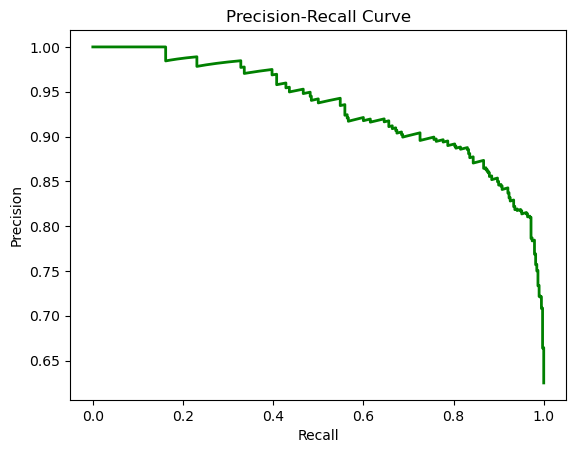

In [24]:
from sklearn.metrics import precision_recall_curve

# Generate precision-recall values
precision, recall, _ = precision_recall_curve(true_classes, predictions)

# Plot and show the precision-recall curve
plt.figure()
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


1/1 [==============================] - 2s 2s/step


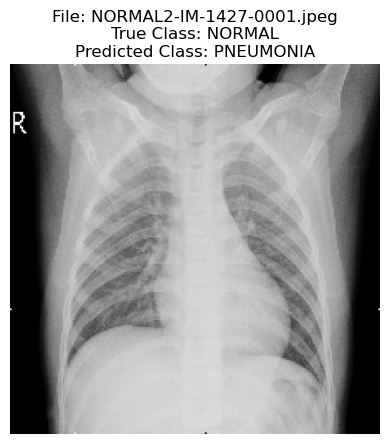

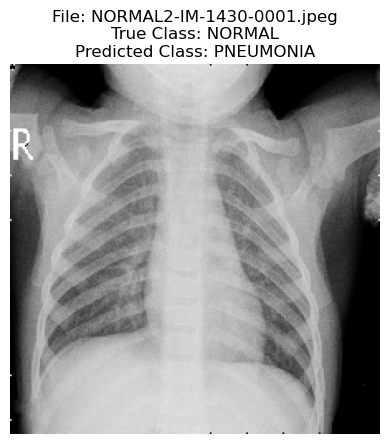

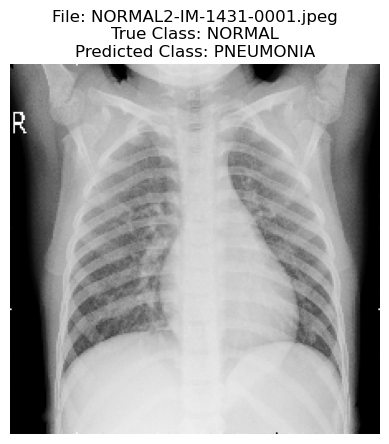

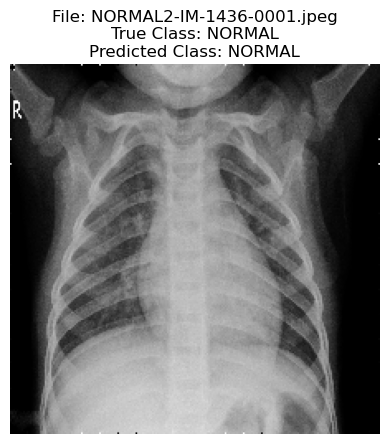

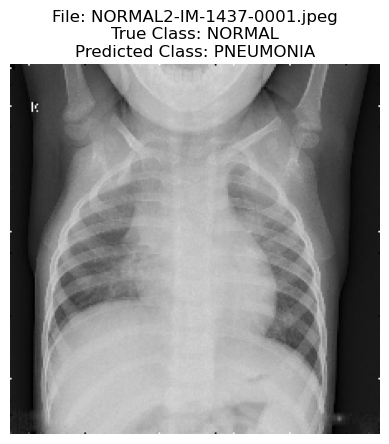

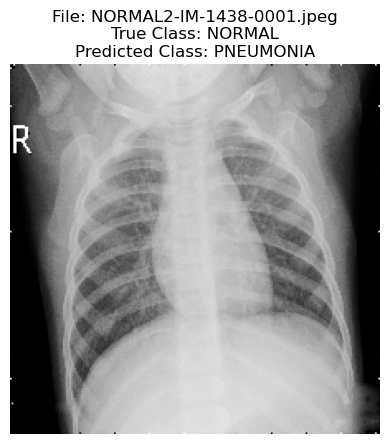

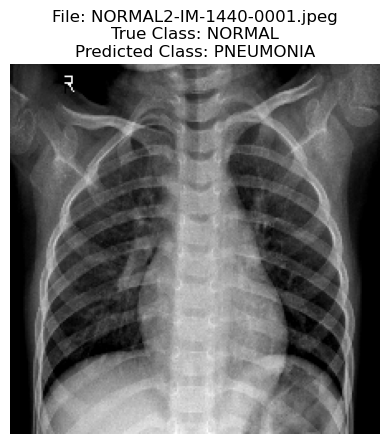

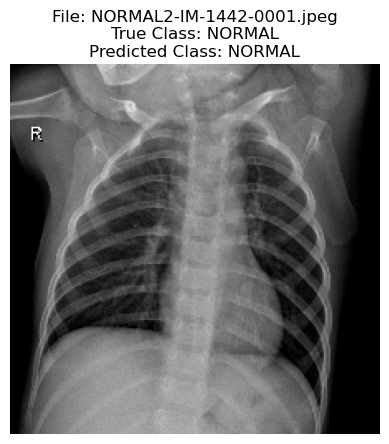

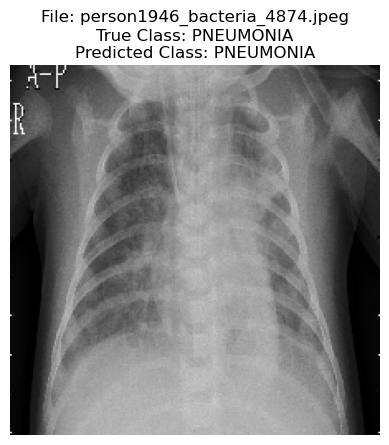

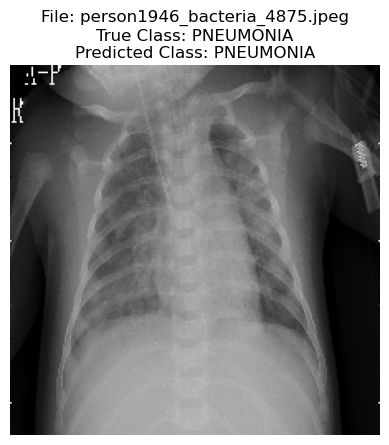

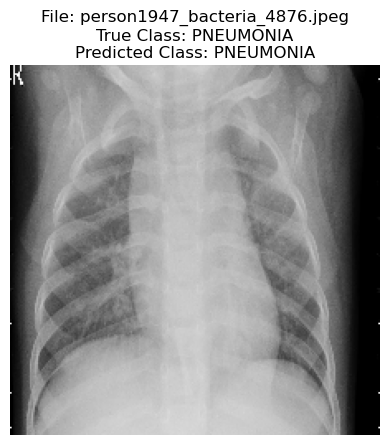

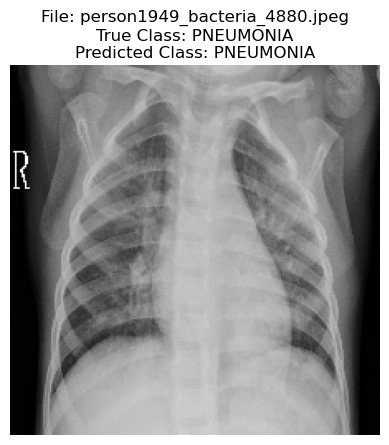

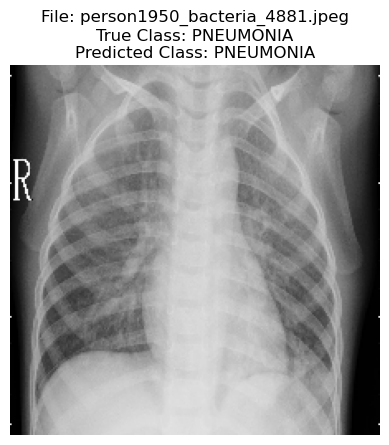

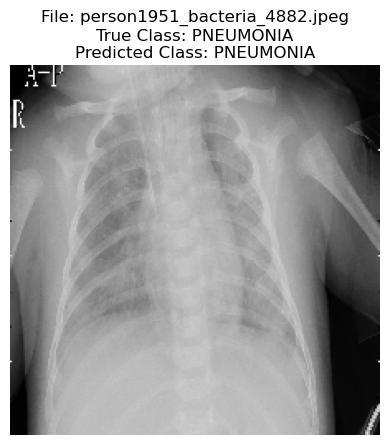

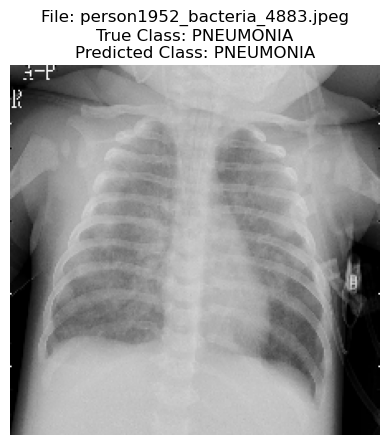

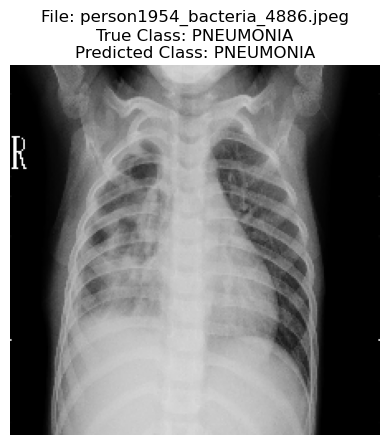

In [24]:
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

def load_and_preprocess_val_data(data_dir):
    images = []
    class_labels = []
    file_names = []
    img_size = (224, 224)  
    labels = ['NORMAL', 'PNEUMONIA']   
    
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        
        for img_file in os.listdir(path):
            try:
                img = load_img(os.path.join(path, img_file), target_size=img_size)
                img_array = img_to_array(img)
                img_array = img_array / 255.0  
                images.append(img_array)
                class_labels.append(class_num)
                file_names.append(img_file)
            except Exception as e:
                print(e)
    
    return np.array(images), np.array(class_labels), file_names

val_data_dir = 'D:/DataSet1/chest_xray/val'
val_images, val_labels, val_file_names = load_and_preprocess_val_data(val_data_dir)

# Use the model to predict the labels for the validation images
val_predictions = model.predict(val_images)

# Convert predicted probabilities to binary labels (0 or 1)
predicted_labels = [1 if pred > 0.5 else 0 for pred in val_predictions]

for i in range(len(val_images)):
    img = cv2.cvtColor(np.array(val_images[i] * 255, dtype=np.uint8), cv2.COLOR_RGB2BGR)
    label = val_labels[i]
    prediction = predicted_labels[i]
    file_name = val_file_names[i]
    
    if label == 0:
        true_class = 'NORMAL'
    else:
        true_class = 'PNEUMONIA'
    
    if prediction == 0:
        predicted_class = 'NORMAL'
    else:
        predicted_class = 'PNEUMONIA'
    
    plt.imshow(img)
    plt.title(f'File: {file_name}\nTrue Class: {true_class}\nPredicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 128ms/step


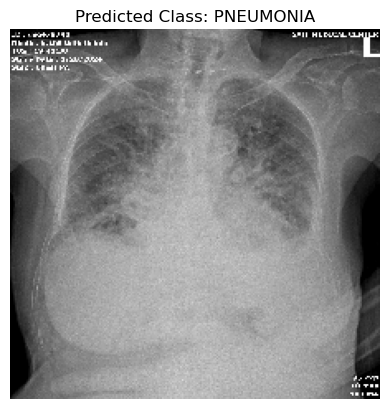

In [25]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def load_and_preprocess_single_image(image_path, img_size=(224, 224)):
    try:
        # Load and preprocess one image
        img = load_img(image_path, target_size=img_size)
        img_array = img_to_array(img)
        img_array = img_array / 255.0  # Normalize to [0,1]
        return img_array
    except Exception as e:
        print(e)
        return None

# Specify the path to your single image
image_path = 'D:\Val/Image3.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_single_image(image_path)

# Assuming 'model' is already defined and compiled
if img_array is not None:
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    val_prediction = model.predict(img_array)
    # Convert predicted probabilities to binary label (0 or 1)
    predicted_label = 1 if val_prediction > 0.5 else 0

    # Convert image array back to image
    img = cv2.cvtColor(np.array(img_array[0] * 255, dtype=np.uint8), cv2.COLOR_RGB2BGR)

    # Set the predicted class
    predicted_class = 'PNEUMONIA' if predicted_label == 1 else 'NORMAL'

    # Display the image
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()
else:
    print("Failed to load and preprocess the image.")


1/1 [==============================] - 0s 128ms/step


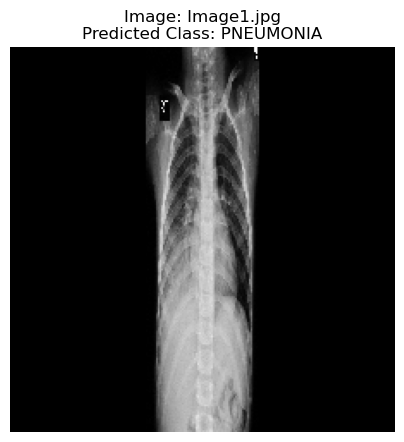

1/1 [==============================] - 0s 98ms/step


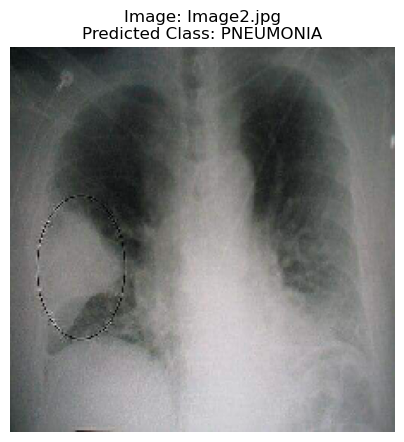

1/1 [==============================] - 0s 147ms/step


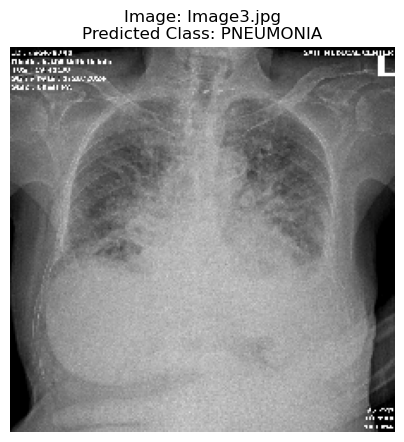

1/1 [==============================] - 0s 114ms/step


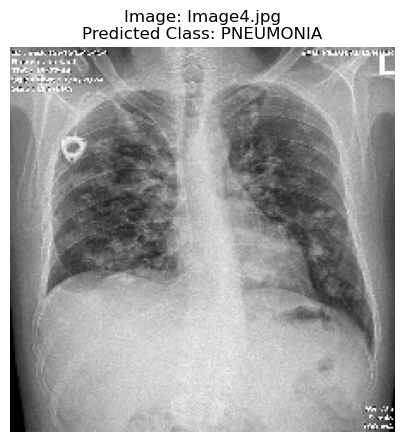

1/1 [==============================] - 0s 124ms/step


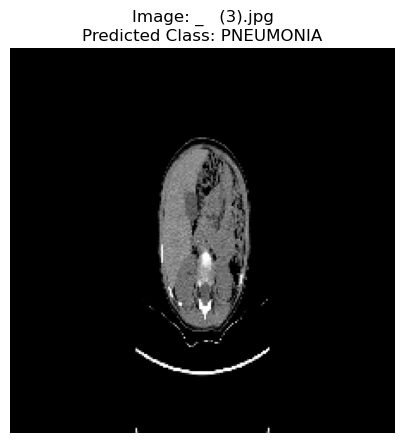

1/1 [==============================] - 0s 126ms/step


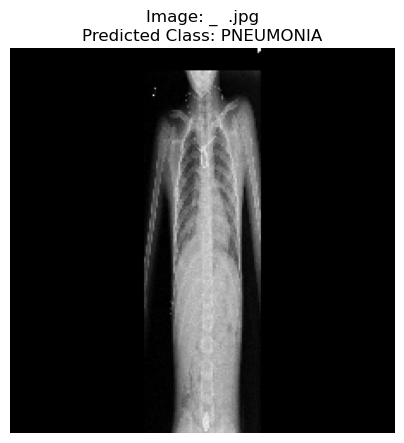

In [26]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def load_and_preprocess_images_from_directory(directory_path, img_size=(224, 224)):
    images_array = []
    image_paths = []
    # Loop through all files in the directory
    for filename in os.listdir(directory_path):
        # Construct the full path to the file
        file_path = os.path.join(directory_path, filename)
        # Check if it's a file (and not a directory)
        if os.path.isfile(file_path):
            try:
                # Load and preprocess one image
                img = load_img(file_path, target_size=img_size)
                img_array = img_to_array(img)
                img_array = img_array / 255.0  # Normalize to [0,1]
                images_array.append(img_array)
                image_paths.append(file_path)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
    return images_array, image_paths

# Specify the directory path containing the images
directory_path = 'D:/Val/'

# Load and preprocess all images in the directory
images_array, image_paths = load_and_preprocess_images_from_directory(directory_path)

# Assuming 'model' is already defined and compiled
for i, img_array in enumerate(images_array):
    img_array_expanded = np.expand_dims(img_array, axis=0)  # Add batch dimension
    val_prediction = model.predict(img_array_expanded)
    # Convert predicted probabilities to binary label (0 or 1)
    predicted_label = 1 if val_prediction > 0.5 else 0

    # Convert image array back to image
    img = cv2.cvtColor(np.array(img_array * 255, dtype=np.uint8), cv2.COLOR_RGB2BGR)

    # Set the predicted class
    predicted_class = 'PNEUMONIA' if predicted_label == 1 else 'NORMAL'

    # Display the image and prediction
    plt.figure(figsize=(5, 5))  # Adjust figure size as needed
    plt.imshow(img)
    plt.title(f'Image: {os.path.basename(image_paths[i])}\nPredicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()
